# Universelle RRS funksjoner for RRS. H1 vs H2 vs Ecolight med ATM korreksjon

## Imports

In [ ]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)


import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" 

hei fra utformet bedre :)


In [ ]:

importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading 

In [ ]:
#H1
##H1
image_path_t_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc") 

trondheim_path_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc")
trondheim_path_25_0511_b = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1b.nc")
trondheim_path_25_0511_c = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1c.nc")########## OBSOBSOSOSSB IKKE TRONDHIEM
trondheim_path_25_0511_d = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1d.nc")

satobj_h1_25_0511 = Hypso1( path = trondheim_path_25_0511, verbose = True )

l1a_cube_25_0511 = satobj_h1_25_0511.l1a_cube
l1b_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_b, verbose = True )
l1c_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_c, verbose = True )
l1d_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_d, verbose = True )

l1b_cube_25_0511 = l1b_cube_25_0511.l1c_cube
l1c_cube_25_0511 = l1c_cube_25_0511.l1b_cube
l1d_cube_25_0511 = l1d_cube_25_0511.l1d_cube

satobj_h1_25_0511.run_direct_georeferencing() 

[INFO] Loading L1a capture image63N9E_2025-05-11T10-04-27Z


[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1746957180.000000 to 1746958140.000000
[INFO] Frame time range: 1746957867.923740 to 1746957917.673740
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 32

In [4]:
## H2
i_250511_2 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1a.nc")
i_250511_2_b = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1b.nc")
i_250511_2_c = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc")
i_250511_2_d = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1d.nc")

satobj_h1_250511_2 = Hypso2( path = i_250511_2, verbose = True )

l1a_cube_250511_2 = satobj_h1_250511_2.l1a_cube
l1b_cube_250511_2 = Hypso2( path = i_250511_2_b, verbose = True )
l1c_cube_250511_2 = Hypso2( path = i_250511_2_c, verbose = True )
l1d_cube_250511_2 = Hypso2( path = i_250511_2_d, verbose = True )

l1c_cube_250511_2 = l1c_cube_250511_2.l1c_cube
l1b_cube_250511_2 = l1b_cube_250511_2.l1b_cube
l1d_cube_250511_2 = l1d_cube_250511_2.l1d_cube

satobj_h1_250511_2.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1746964170.000000 to 1746965100.000000
[INFO] Frame time range: 1746964837.479518 to 1746964912.104518
[INFO] 299 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [5]:
path_cla_atm_250511 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc.polymer.nc")######
cla_atm_250511 = xr.open_dataset(path_cla_atm_250511)

latitude_250511 = np.array(cla_atm_250511['latitude'])
longitude_250511 = np.array(cla_atm_250511['longitude'])

## Target lat long

In [ ]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] #område 7  
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  ##

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] #område 6.1 #
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

In [7]:
cal_x_250511 = 72
cal_y_250511 = -19

## RRS H1 AC

Antall piksler i RRS_H1_no_AC: 8


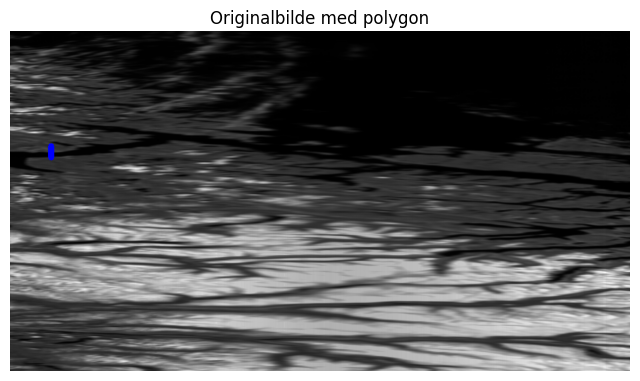

Antall piksler i RRS_H1_no_AC: 1941


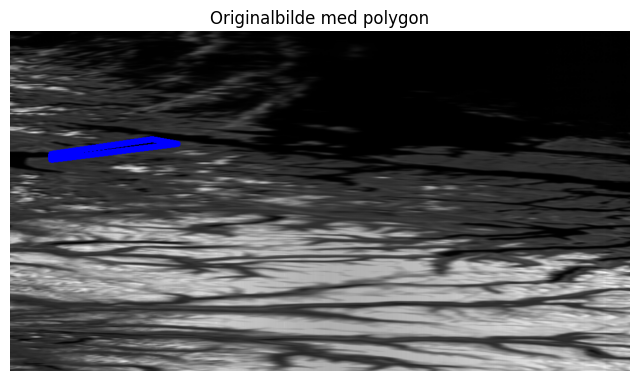

Antall piksler i RRS_H1_no_AC: 1846


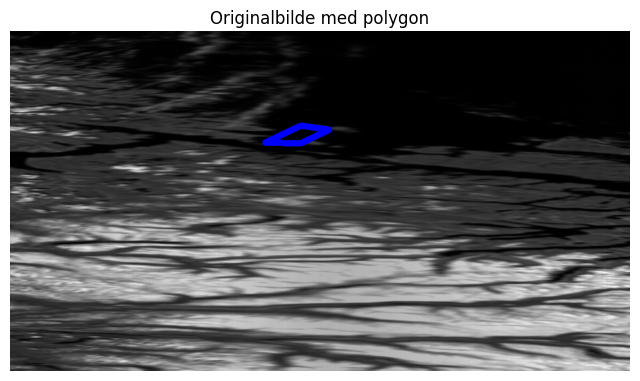

Antall piksler i RRS_H1_no_AC: 4165
this area not calibrated, here is target lat: [63.856648, 63.959085, 63.949196, 63.853017]
Antall piksler i RRS_H1_no_AC: 6631
this area not calibrated, here is target lat: [64.152913, 64.254748, 64.280744, 64.145967]


In [8]:
RRS_NO_AC_H1_250511_A1 = uf.automated_RRS_NO_AC_H1(satobj_h1_25_0511, l1d_cube_25_0511, target_lat_1, target_lon_1, cal_x_250511, cal_y_250511)
RRS_NO_AC_H1_250511_A2 = uf.automated_RRS_NO_AC_H1(satobj_h1_25_0511, l1d_cube_25_0511, target_lat_2, target_lon_2, cal_x_250511, cal_y_250511)
RRS_NO_AC_H1_250511_A3 = uf.automated_RRS_NO_AC_H1(satobj_h1_25_0511, l1d_cube_25_0511, target_lat_3, target_lon_3, cal_x_250511, cal_y_250511)
RRS_NO_AC_H1_250511_A5 = uf.automated_RRS_NO_AC_H1(satobj_h1_25_0511, l1d_cube_25_0511, target_lat_5, target_lon_5, cal_x_250511, cal_y_250511)
RRS_NO_AC_H1_250511_A6 = uf.automated_RRS_NO_AC_H1(satobj_h1_25_0511, l1d_cube_25_0511, target_lat_6, target_lon_6, cal_x_250511, cal_y_250511)

In [9]:
RRS_median_H1_NO_AC_A1 = np.median(RRS_NO_AC_H1_250511_A1, axis=0)
RRS_median_H1_NO_AC_A2 = np.median(RRS_NO_AC_H1_250511_A2, axis=0)
RRS_median_H1_NO_AC_A3 = np.median(RRS_NO_AC_H1_250511_A3, axis=0)
RRS_median_H1_NO_AC_A5 = np.median(RRS_NO_AC_H1_250511_A5, axis=0)
RRS_median_H1_NO_AC_A6 = np.median(RRS_NO_AC_H1_250511_A6, axis=0)

print(RRS_median_H1_NO_AC_A1.shape)

(109,)


## RRS H2 AC

Antall piksler i RRS_H1_no_AC: 1477
Antall piksler i RRS_H1_no_AC: 657
Antall piksler i RRS_H1_no_AC: 521
Antall piksler i RRS_H1_no_AC: 1215
Antall piksler i RRS_H1_no_AC: 1950


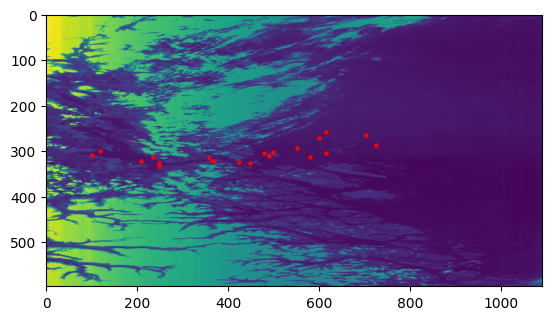

In [10]:
RRS_NO_AC_H2_250511_A1 = uf.automated_RRS_NO_AC_H2(satobj_h1_250511_2, l1d_cube_250511_2, target_lat_1, target_lon_1, latitude_250511, longitude_250511)
RRS_NO_AC_H2_250511_A2 = uf.automated_RRS_NO_AC_H2(satobj_h1_250511_2, l1d_cube_250511_2, target_lat_2, target_lon_2, latitude_250511, longitude_250511)
RRS_NO_AC_H2_250511_A3 = uf.automated_RRS_NO_AC_H2(satobj_h1_250511_2, l1d_cube_250511_2, target_lat_3, target_lon_3, latitude_250511, longitude_250511)
RRS_NO_AC_H2_250511_A5 = uf.automated_RRS_NO_AC_H2(satobj_h1_250511_2, l1d_cube_250511_2, target_lat_5, target_lon_5, latitude_250511, longitude_250511)
RRS_NO_AC_H2_250511_A6 = uf.automated_RRS_NO_AC_H2(satobj_h1_250511_2, l1d_cube_250511_2, target_lat_6, target_lon_6, latitude_250511, longitude_250511)

In [11]:
RRS_median_H2_NO_AC_A1 = np.median(RRS_NO_AC_H2_250511_A1, axis=0)
RRS_median_H2_NO_AC_A2 = np.median(RRS_NO_AC_H2_250511_A2, axis=0)
RRS_median_H2_NO_AC_A3 = np.median(RRS_NO_AC_H2_250511_A3, axis=0)
RRS_median_H2_NO_AC_A5 = np.median(RRS_NO_AC_H2_250511_A5, axis=0)
RRS_median_H2_NO_AC_A6 = np.median(RRS_NO_AC_H2_250511_A6, axis=0)

print(RRS_median_H2_NO_AC_A1.shape)

(109,)


## Plot

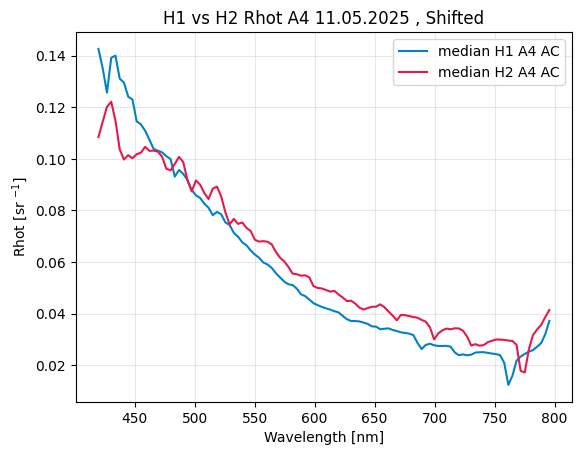

In [ ]:
#H1
#plt.plot(wl, RRS_median_H1_NO_AC_A1, color="#1f77b4", linestyle= '-',  label='median H1 no AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A2, color="#1f77b4", linestyle= '--', )#label='median H1 A2 AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A3, color="#1f77b4", linestyle= ':',  )#label='median H1 A3 AC')
plt.plot(np.array(wl) + 11, np.array(RRS_median_H1_NO_AC_A5)+.004, color="#0082c8", linestyle= '-', label='median H1 A4 AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A6, color="#1f77b4", linestyle= '-',  )#label='median H1 A5 AC',  marker="o")

#H2
#plt.plot(wl, RRS_median_H2_NO_AC_A1, color="#2ca02c", linestyle= '-',  label='median H2 no AC')
#plt.plot(wl, RRS_median_H2_NO_AC_A2, color="#2ca02c", linestyle= '--', )#label='median H2 A2 AC')
#plt.plot(wl, RRS_median_H2_NO_AC_A3, color="#2ca02c", linestyle= ':',  )#label='median H2 A3 AC')
plt.plot(wl, RRS_median_H2_NO_AC_A5, color="#e6194b", linestyle= '-', label='median H2 A4 AC')
#plt.plot(wl, RRS_median_H2_NO_AC_A6, color="#2ca02c", linestyle= '-',  )#label='median H2 A5 AC',  marker="o")


plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr $^{-1}$]") #Er begge water leaving radience???
plt.title("H1 vs H2 Rhot A4 11.05.2025 , Shifted") ## bruke AC som Atmosperic Correction 

plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/H1vsH2_noAC/H1vsH2_noAC_A4.pdf', dpi=300, bbox_inches='tight')
plt.show()
